In [1]:
import pandas as pd
import os

In [2]:
os.listdir('C:/Users/stask/Analitics_Karpov/Module4/Project analysis of purchases/data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [3]:
os.getcwd()

'C:\\Users\\stask\\Analitics_Karpov\\Module4\\Project analysis of purchases'

Collect all the data from the data folder into one dataframe with the following columns: columns from the files themselves (product_id, quantity), as well as the user name (name), and the date of these purchases (date, corresponds to the name of the folder where the user's folder lies).

In [4]:
# DataFrame which will contain all the sub_df
df = pd.DataFrame()
# read data from all files and add to df
path = 'C:/Users/stask/Analitics_Karpov/Module4/Project analysis of purchases/data'
for current_path, dirs, files in os.walk(path):
    for file in files:
        sub_df = pd.read_csv(current_path + '/' + file)
        # we need to add data and name of user
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        # add date and name columns to sub_dt
        sub_df['date'] = date
        sub_df['name'] = name
        # vertical union of every sub_df
        df = pd.concat((df,sub_df))
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [5]:
df.reset_index(drop=True, inplace=True)
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [6]:
from pathlib import Path
path = Path('C:/Users/stask/Analitics_Karpov/Module4/Project analysis of purchases/data')
# dir(path)
# DataFrame which will contain all the sub_df
df = pd.DataFrame()
# read data from all files and add to df
path = 'C:/Users/stask/Analitics_Karpov/Module4/Project analysis of purchases/data'
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
        sub_df = pd.read_csv(part_path / file)
        # we need to add data and name of user
        date = part_path.parts[-2]
        name = part_path.name
        # add date and name columns to sub_dt
        sub_df['date'] = date
        sub_df['name'] = name
        # vertical union of every sub_df
        df = pd.concat((df,sub_df))
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


Find out which user has bought the most items. If there is more than one, list the names separated by a comma with a space and in alphabetical order.

In [7]:
df.groupby('name', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


Find the top 10 items by the number of units sold over all time and build a barplot. How many units of the product with product_id==56 were sold?

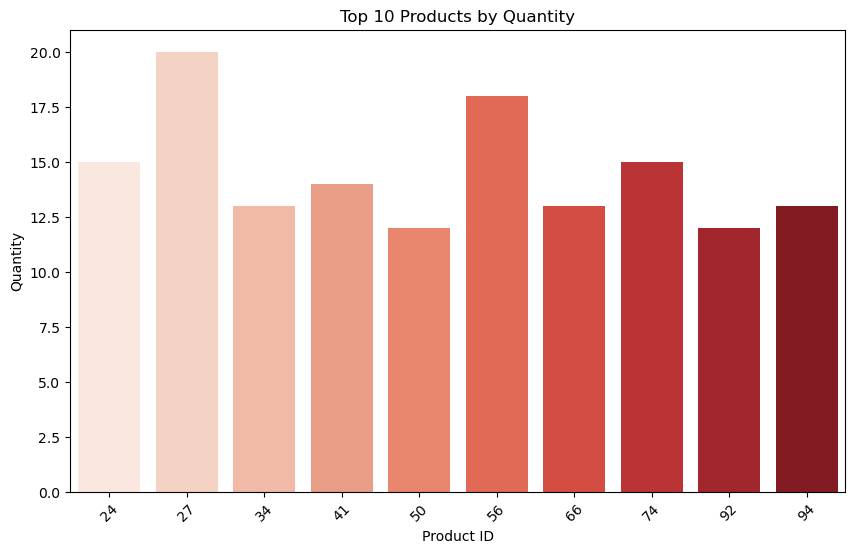

In [8]:
# df_id_56 = df.query('product_id == 56') \
#     .groupby('product_id', as_index=False) \
#     .agg({'quantity':'sum'})
# print(df_id_56['quantity'])

df_items_top10 = df.groupby('product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False).head(10)
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='quantity', data=df_items_top10, palette='Reds')

# Setting labels and title
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Top 10 Products by Quantity')

# Rotating x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

Visualise the sales by days.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


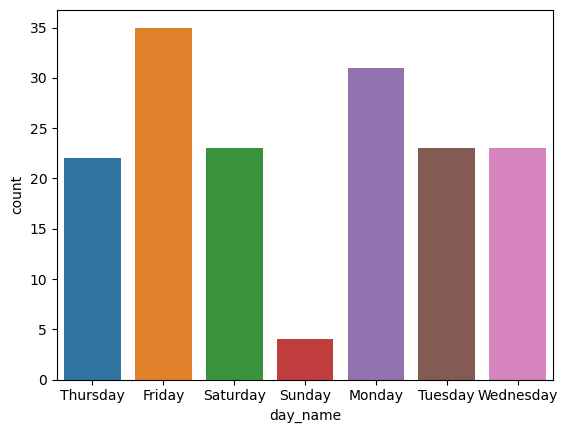

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df.date.dt.day_name()
ax = sns.countplot(df.day_name)

How many users have purchased any product repeatedly (more than 1 time)? Repeat purchases of an item with the same product_id made on different days will be considered as repeat purchases. 

In [24]:
df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'quantity':'count'}) \
    .rename(columns={'quantity':'num_purchase'}) \
    .sort_values('num_purchase', ascending=False) \
    .query('name != "Alexey_Smirnov"')

,name,product_id,num_purchase
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
103,Petr_Petrov,64,1
104,Petr_Petrov,84,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1


In [27]:
df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date':pd.Series.nunique}) \
    .sort_values('date', ascending=False)

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1
